In [28]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset_path = "/run/media/dracyr/Musik/Music Datasets/giantsteps-tempo-dataset/"

audio_files = []
for file in os.listdir(dataset_path + "audio/"):
    if file.endswith(".mp3"):
        audio_files.append(os.path.join(dataset_path + "audio/", file))
audio_files.sort()        

annotation_files = []
for file in os.listdir(dataset_path + "annotations/genre/"):
    if file.endswith(".genre"):
        annotation_files.append(os.path.join(dataset_path + "annotations/genre/", file))
annotation_files.sort()

In [100]:
from sklearn import preprocessing

annotations = []
for file in annotation_files:
    f = open(file)
    genre = f.read().strip()
    annotations.append(genre)

le = preprocessing.LabelEncoder()
ann = le.fit_transform(annotations)

In [117]:
# Show first file
import librosa
import matplotlib.pyplot as plt
import librosa.display

def file_to_spectrogram(path, seconds=30):
    y, sr = librosa.load(path)
    y = y[:seconds * sr] # Cut the audio to the first 30 seconds
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    return S    

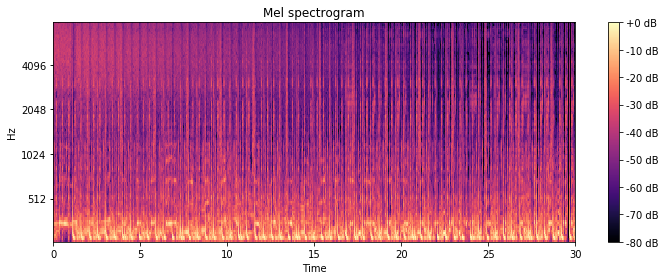

In [118]:
import matplotlib.pyplot as plt
import librosa.display

def plot_spectrogram(spectrogram):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()

first_file = file_to_spectrogram(files[0])
plot_spectrogram(first_file)

In [119]:
from sklearn.externals import joblib

generate_data = True
if generate_data:
    i = 0
    af = audio_files[:3]
    d = []
    for file in af:
        i = i + 1
        print("\r" + str(i) + "/" + str(len(audio_files)), end='')
        d.append(file_to_spectrogram(file))   
    audio_data = np.stack(d, axis=0)
    # Persist data to disk
    joblib.dump(audio_data, 'audio_data.pkl') 

3/664

In [120]:
X = joblib.load('audio_data.pkl') 

print(audio_data.shape)

(3, 128, 1292)


In [121]:
from sklearn.model_selection import train_test_split

FREQ_BUCKETS = 128
TIME_BUCKETS = 5168
DATA_SHAPE = (FREQ_BUCKETS, TIME_BUCKETS)

y = ann[:3]

# Resample for the sklearn models sake
nsamples, nx, ny = X.shape
X2 = X.reshape((nsamples,nx*ny))

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.20, random_state=42)

In [123]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [125]:
import numpy as np
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred, normalize=False)

0

[7]
